# CMSE 202 Final Project: Evolution/Natural Selection

Larissa Ford, Bryan Wen, Zachary Harless

## Check Point
#### 1) Statement of the problem. Describe the problem and why it is interesting, important, difficult etc.
Modeling evolution and Natural selection. We will model different scenarios to see how environment and external factors can influence the evolution of a species. This is especially important in our rapidly changing world with global warming, habitat destruction, and  pollution. The most difficult part of the problem will most likely be finding data to compare our model to. There is not a lot of evolution data available for download which will make it harder to decide which attributes are the most important when constructing a model of this type.

#### 2) Data you will use. What data are you going to utilize? Can you describe the quality of the data (how much, how recent, how accurate, etc.)
We can look at studies of natural selection to see if our model is accurate in order to tweak randomness and variables.

https://www.kaggle.com/uciml/zoo-animal-classification
We could use this dataset to get some base attributes for our species
#### 3) What kind of model are you going to develop? Say something about your model (how appropriate it is for your data, its strengths and weaknesses, etc.)
We will develop an object oriented system in different environments with different interspecies interactions and features. A strength of this model is its variablity which allows many factors to be quickly changed and tested. A weakness is fact that getting accurate interactions with the environment may prove difficult. This is more appropriate than a machine learning model because there are too many attributes/variables to try and predict at every iteration which would result in a high computational cost.

#### 4) How will you test your model? What evaluation criteria are you going to use?
 We will find some studies and predict what our population should look like after a period of time. We will not get exact values due to the randomness that is found in nature and will be represented in our model, but we will be able to see the general trends and whether our predictions are accurate. 
 
#### 5) Provide your results. Indicate how well your model matched the data (did you do training vs testing, what size, etc.)
To be completed

#### 6) Conclusions. Things you might do differently, problems you ran into, etc.
To be completed


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import display, clear_output
import time
import random
maxx=100
maxy=100
import seaborn as sns

In [49]:
#I was having difficulties executing the code how I wanted with selective pressure affecting both species so I decided to just have prey reproduce and die. Predators are constant

class Predator():# creating class for species- feel free to rename
    def __init__(self, age=10):
        #basic starting  stuffs
        self.x = np.random.uniform(0, 100)  # initial random x position
        self.y = np.random.uniform(0, 100)  # initial random y position
        self.speed = np.random.uniform(2,3)  # non-directional speed
        self.x_vel = np.random.uniform(0,2)*np.random.choice([-1,1])  # initial random x velocity
        self.y_vel = np.sqrt((self.speed**2-self.x_vel**2))*np.random.choice([-1,1])  # calculate y-velocity based on speed and x-velocity
        self.color= None
        self.age = age
        self.max_age= 500#maximum age of animal
        self.offspring = 4#number of offspring
        self.hunger= 400#hunger level-- will die at 0
        self.diet= Predator#predator, herbivore
        self.range= 10# the area the animal can detect another
        self.attack_range =4# the proximity needed to kill
        self.dead = 0
        self.pregnant=False
        self.pregnancy_time=4
        self.reproductive_affinity=np.random.randint(10)
        self.max_speed=np.random.uniform(10)
    def birth(self):
        children = []  # list of new children
        if self.pregnancy_time==0:  #if pregnancy_time is 0, will give birth
            for i in range(self.offspring):  # make new children with same position
                child=Predator()
                child.speed=self.speed+np.random.uniform(0,2)*np.random.choice([-1,1])
                child.max_age=self.max_age+np.random.uniform(0,2)*np.random.choice([-1,1])
                child.range=self.range+np.random.uniform(0,2)*np.random.choice([-1,1])
                child.attack_range=self.attack_range+np.random.uniform(0,2)*np.random.choice([-1,1])
                child.max_speed=(self.max_speed+np.random.uniform(0,2)*np.random.choice([-1,1]))
                self.age=0
                child.x=self.x
                child.y=self.y
                child.x_vel = np.random.uniform(0,2)*np.random.choice([-1,1])  # initial random x velocity
                child.y_vel = np.sqrt((self.speed**2-self.x_vel**2))*np.random.choice([-1,1])
                children.append(child)
            self.pregnant=False
        return children  # return new list of children
        
            
    def reproduce(self,predator):
        if self.pregnant==False and self.age>10 and self.reproductive_affinity<5:
            x_diff = predator.x - self.x
            y_diff = predator.y - self.y
            if x_diff==0:
                x_diff+=0.1
            if np.sqrt(x_diff**2+y_diff**2) <= self.range:  # if whithin detection range
                angle = np.arctan(y_diff/x_diff)
                self.x_vel = self.speed = np.cos(angle)
                self.y_vel = self.speed = np.sin(angle)
            if np.sqrt(x_diff**2+y_diff**2) <=1:
                self.pregnant=True
                self.reproductive_affinity=10
                
    def move(self):
        self.x= self.x + self.x_vel
        self.y=self.y +self.y_vel
        if self.x > maxx: # wrap from right side
            self.x = 0
        if self.x < 0:  # wrap from left side
            self.x = maxx
        if self.y > maxy:  # wrap from top
            self.y = 0
        if self.y < 0:  # wrap from bottom
            self.y = maxy
  
    def hunt(self,prey):
        if self.hunger<200:
            x_diff = prey.x - self.x
            y_diff = prey.y - self.y
            if x_diff==0:
                x_diff+=.01 
            if np.sqrt(x_diff**2+y_diff**2) <= self.attack_range:  # if within attack range
                if self.max_speed> prey.max_speed:
                    # will kill if within attack range
                    self.hunger += 1000  # eats prey
                    prey.dead = 1
               # self.x_vel=np.random.uniform(0,2)*np.random.choice([-1,1])  # initial random x velocity
                #self.y_vel = np.sqrt((self.speed**2-self.x_vel**2))*np.random.choice([-1,1])  # calculate y-velocity based on speed and x-velocity
   
            #if np.sqrt(x_diff**2+y_diff**2) <= self.range:  # if within detection range
                #angle = np.arctan(y_diff/x_diff)
               # self.x_vel = self.max_speed = np.cos(angle)
                #self.y_vel = self.max_speed = np.sin(angle)
                
    def forage():
        if food>0:
            hunger+=1
    def update(self,prey,predator):
        children=[]
        if self.dead==0:
            self.age += 0.1
            self.hunger -=1
            self.move()
            self.hunt(prey)
            #self.reproduce(predator)
            self.reproductive_affinity-=1
            #if self.age>= self.max_age:
                #self.dead = 1
            if self.pregnant==True:
                self.pregnancy_time-=1
                if self.pregnancy_time==0:
                    children+= self.birth()
            if self.hunger <=-1:
                #self.dead=1
                pass
        return children
    
class Prey():# creating class for species- feel free to rename
    def __init__(self):
        #basic starting  stuffs
        self.x = np.random.uniform(0, 100)  # initial random x position
        self.y = np.random.uniform(0, 100)  # initial random y position
        self.speed = np.random.uniform(2,3)  # non-directional speed
        self.x_vel = np.random.uniform(0,2)*np.random.choice([-1,1])  # initial random x velocity
        self.y_vel = np.sqrt((self.speed**2-self.x_vel**2))*np.random.choice([-1,1])  # calculate y-velocity based on speed and x-velocity
        self.color= None
        self.age = 10
        self.max_age= 50#maximum age of animal
        self.offspring = 10#number of offspring
        self.hunger= 100#hunger level-- will die at 0
        self.diet= Prey
        self.range= 5# the area the animal can detect another
        self.dead = 0
        self.pregnant=False
        self.pregnancy_time=2
        self.reproductive_affinity=np.random.randint(10)
        self.max_speed= np.random.uniform(5)
    def birth(self):
        children = []  # list of new children
        if self.pregnancy_time==0:  #if pregnancy_time is 0, will give birth
            for i in range(self.offspring):  # make new children with same position
                child=Prey()
                child.speed=self.speed+np.random.uniform(0,2)*np.random.choice([-1,1])
                child.max_age=self.max_age+np.random.uniform(0,2)*np.random.choice([-1,1])
                child.range=self.range+np.random.uniform(0,2)*np.random.choice([-1,1])
                child.max_speed=self.max_speed+np.random.uniform(0,2)*np.random.choice([-1,1])
                child.age=0
                child.x=self.x
                child.y=self.y
                children.append(child)
        self.pregnant=False
        return children  # return new list of children
        
            
    def reproduce(self,prey):
        if self.pregnant==False and self.age>10 and self.reproductive_affinity==0:
            x_diff = prey.x - self.x
            y_diff = prey.y - self.y
            if x_diff==0:
                x_diff+=.1
            if np.sqrt(x_diff**2+y_diff**2) <= self.range:  # if whithin detection range
                angle = np.arctan(y_diff/x_diff)
                self.x_vel = self.speed = np.cos(angle)
                self.y_vel = self.speed = np.sin(angle)
            if np.sqrt(x_diff**2+y_diff**2) <=1:
                self.pregnant=True
                
    def move(self):
        self.x= self.x + self.x_vel
        self.y=self.y +self.y_vel
        if self.x > maxx: # wrap from right side
            self.x = 0
        if self.x < 0:  # wrap from left side
            self.x = maxx
        if self.y > maxy:  # wrap from top
            self.y = 0
        if self.y < 0:  # wrap from bottom
            self.y = maxy
    #def run(self,predator):
        #if predator.x or predator.y <=2:
            #move away from predator
            #x_diff = predator.x - self.x
            #y_diff = predator.y - self.y
           # if np.sqrt(x_diff**2+y_diff**2) <= self.range:  # if whithin detection range
                #if self.max_speed<=predator.max_speed:
                   # self.dead=1
                #angle = np.arctan(y_diff/x_diff)
                #self.x_vel = self.max_speed = -np.cos(angle)
                #self.y_vel = self.max_speed = -np.sin(angle)
    def eat(self):
        if self.hunger<=3:
            if self.diet== predator:
                self.hunt(prey)
            if self.diet== prey:
                self.forage()
    def forage():
        if food>0:
            hunger+=1
    def update(self,prey):
        children=[]
        if self.dead==0:
            self.age += 0.1
            self.hunger -=0.1
            self.move()
            self.reproduce(prey)
            self.reproductive_affinity-=1
            #self.eat()
            if self.age>= self.max_age:
                self.dead = 1
            elif self.pregnant==True:
                self.pregnancy_time-=1
                if self.pregnancy_time==0:
                    children+= self.birth()
            if self.hunger <=-1:
                self.dead=1
        
        return children
            


In [56]:

def update(predators,prey): 
    for p in prey:  # iterate over all prey
        if p.dead==1: # if the the prey is dead
            prey.remove(p)  # remove it
        else:
            prey += p.update(p)  # update people stats
    for m in predators:  # iterate over all predators
        if m.dead==1: # if the predator is dead
            predators.remove(m)  # remove it
        else:  # if alive
            for p in prey:
                predators += m.update(p,m)
    return len(prey), len(predators)
            
                
        
            
                
 #These are my default settings, I will change them to see how the model is affected       
predators = []  # list of predators
for i in range(100):  # create 10 predators
    predators.append(Predator())
prey = []  # list of prey
for i in range(100):  # create 200 prey
    prey.append(Prey())  # create a prey each time

In [57]:
print([p.dead for p in prey])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


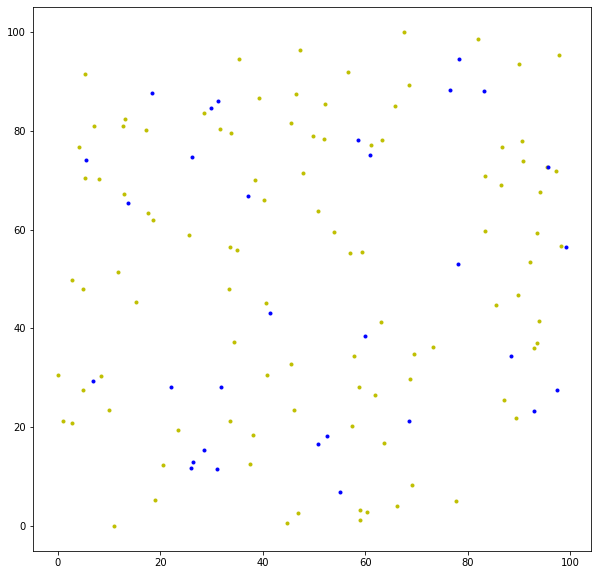

31 100


<Figure size 720x720 with 0 Axes>

In [58]:
#This cell was for testing and changing variables. My results are in the results section

fig = plt.figure(figsize=(10,10)) 
max_time = 100#time to run simulation
time = list(range(0,max_time))

for i in range(50): #loop over time
    prey_count, predator_count=update(predators,prey)
    print(prey_count,predator_count)
    plt.figure(1)
    plt.plot([p.x for p in predators],[p.y for p in predators], 'yo', ms=3) #plot predators as small yellow
    plt.plot([g.x for g in prey],[g.y for g in prey], 'bo', ms=3) 
    #time.sleep(0.1)  #The time the code pauses between adding points
    clear_output(wait = True) #Keeps the plot up rather than creating a new plot each time 
    display(fig)            # Reset display
    fig.clear() 
print(prey_count,predator_count)


24 100


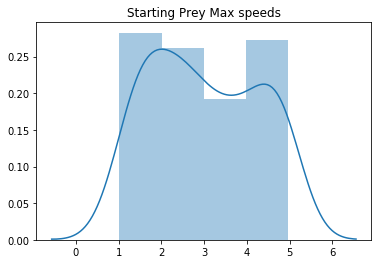

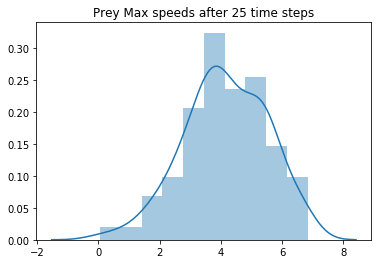

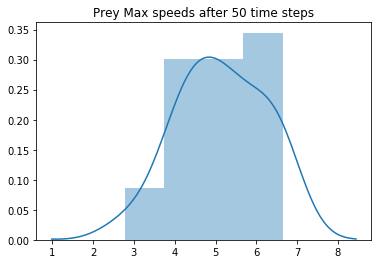

In [68]:
                
 #These are my default settings, I will change them to see how the model is affected       
predators = []  # list of predators
for i in range(100):  # create 10 predators
    predators.append(Predator())
prey = []  # list of prey
for i in range(100):  # create 200 prey
    prey.append(Prey())  # create a prey each time


for i in range(1): #loop over time
    prey_count, predator_count=update(predators,prey)    
plt.figure(1)
sns.distplot([abs(p.max_speed) for p in prey])
plt.title('Starting Prey Max speeds')

fig = plt.figure(2) 
for i in range(25): #loop over time
    prey_count, predator_count=update(predators,prey) 
plt.figure(2)
sns.distplot([abs(p.max_speed) for p in prey])
plt.title('Prey Max speeds after 25 time steps')
    #clear_output(wait = True) #Keeps the plot up rather than creating a new plot each time 
    #display(fig)            # Reset display
    #fig.clear() 
for i in range(25): #loop over time
    prey_count, predator_count=update(predators,prey) 
plt.figure(3)
sns.distplot([abs(p.max_speed) for p in prey])
plt.title('Prey Max speeds after 50 time steps')
print(prey_count, predator_count)